In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('user_bandwidth_usage_pattern_V3.csv')


In [3]:

# Basic statistics
print("Basic Statistics:")
print(df[['signal_strength', 'packet_loss_rate', 'latency', 'jitter_ms', 'bandwidth_speed_per_sec_mbps']].describe())


Basic Statistics:
       signal_strength  packet_loss_rate        latency      jitter_ms  \
count    176257.000000     176257.000000  176257.000000  176257.000000   
mean        -49.975145          0.474289      29.730735       4.762717   
std          11.536231          0.364559      11.066306       3.645141   
min         -70.000000          0.000000      10.000000       0.000000   
25%         -60.000000          0.191800      21.155000       1.940000   
50%         -49.940000          0.383200      28.550000       3.860000   
75%         -39.990000          0.697800      39.220000       7.020000   
max         -30.000000          1.500000      50.000000      15.000000   

       bandwidth_speed_per_sec_mbps  
count                 176257.000000  
mean                      34.458010  
std                       15.212831  
min                       10.000000  
25%                       22.140000  
50%                       33.260000  
75%                       44.415000  
max        

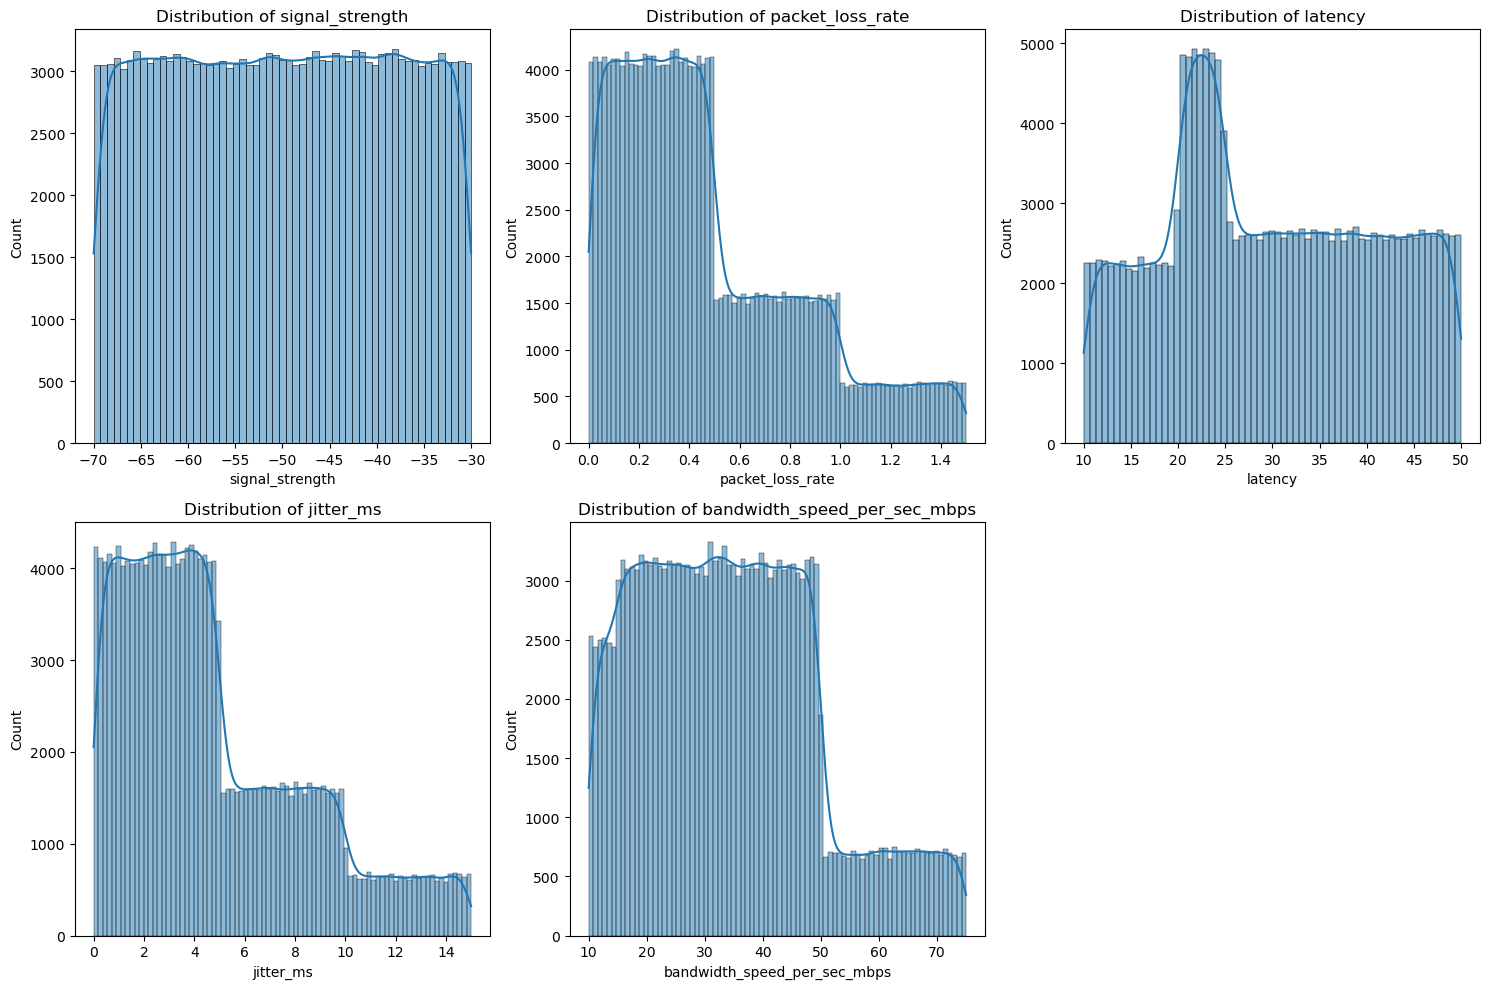

In [4]:

# Histograms for each network metric
plt.figure(figsize=(15, 10))
for i, column in enumerate(['signal_strength', 'packet_loss_rate', 'latency', 'jitter_ms', 'bandwidth_speed_per_sec_mbps'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


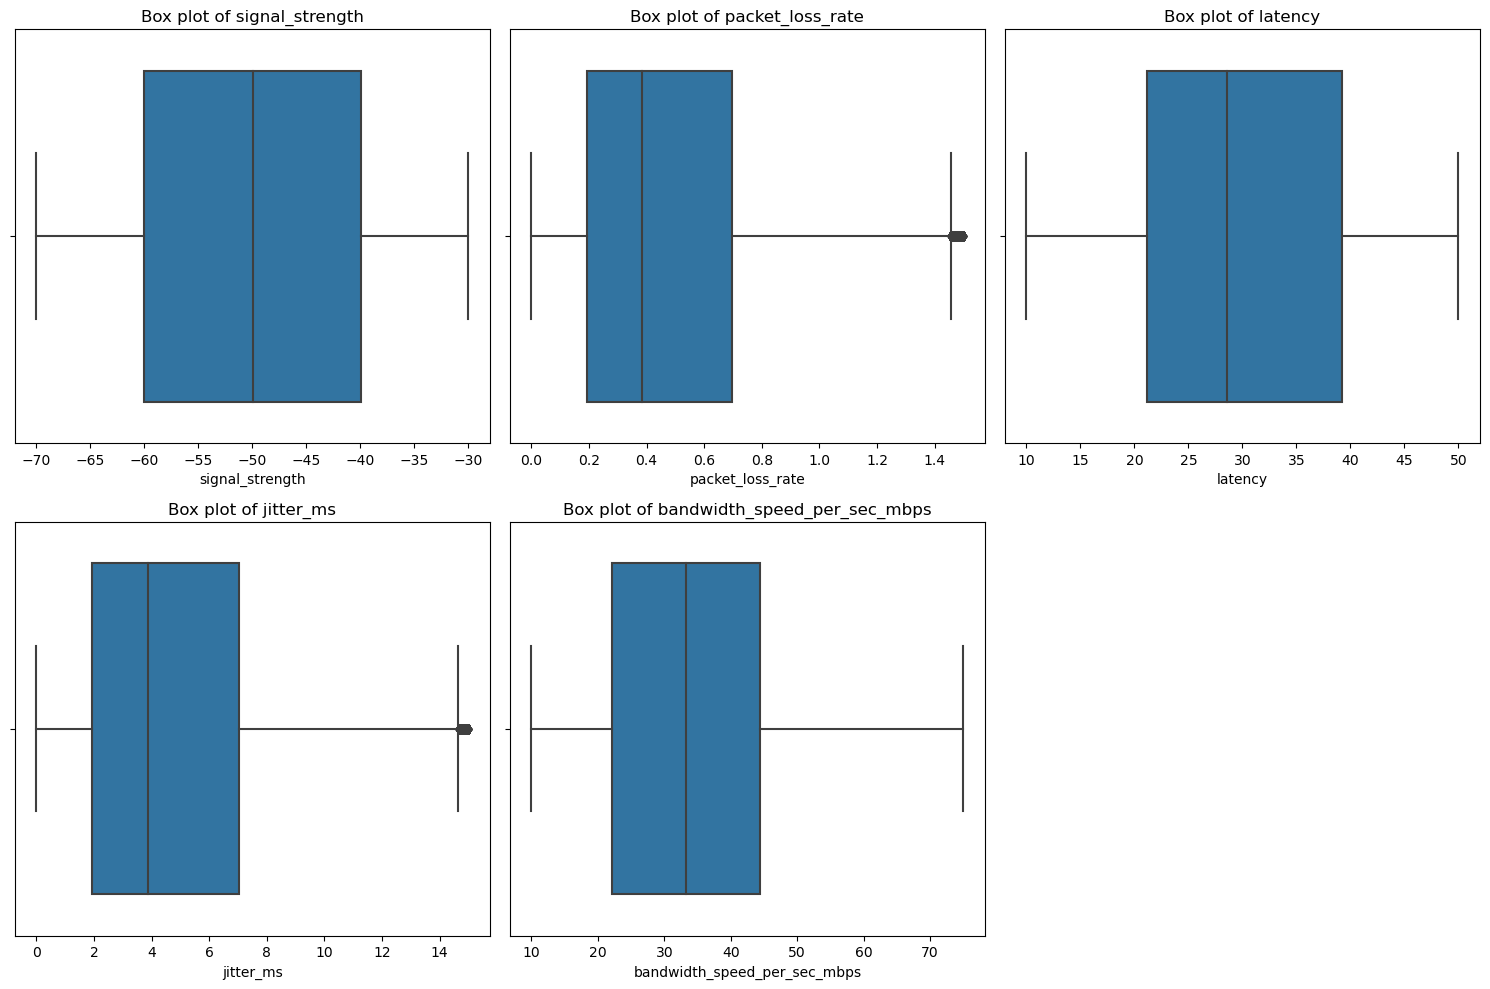

In [5]:

# Box plots to check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(['signal_strength', 'packet_loss_rate', 'latency', 'jitter_ms', 'bandwidth_speed_per_sec_mbps'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()


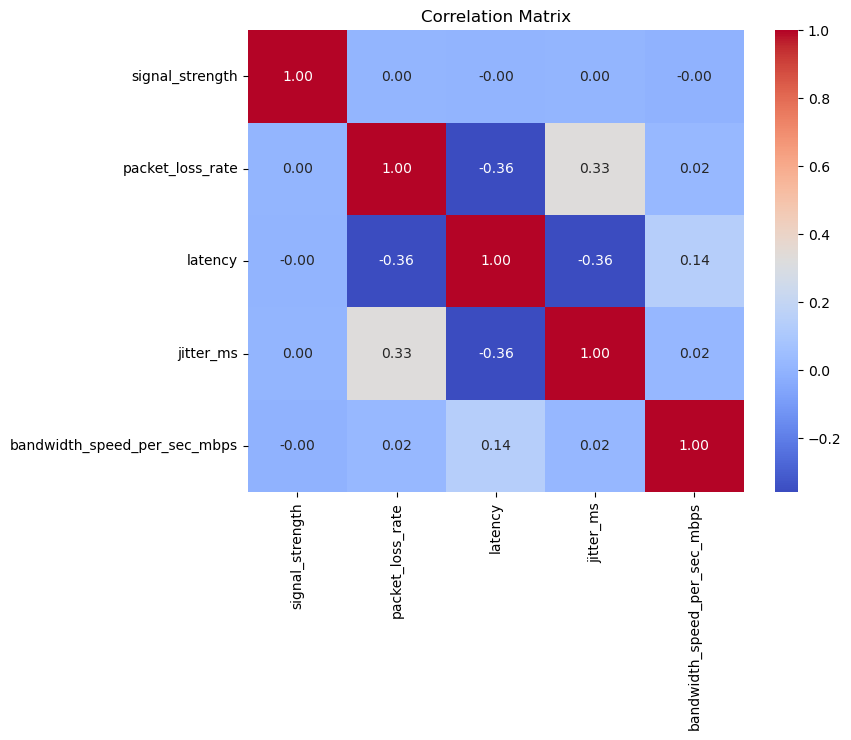

In [6]:

# Correlation matrix
correlation = df[['signal_strength', 'packet_loss_rate', 'latency', 'jitter_ms', 'bandwidth_speed_per_sec_mbps']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


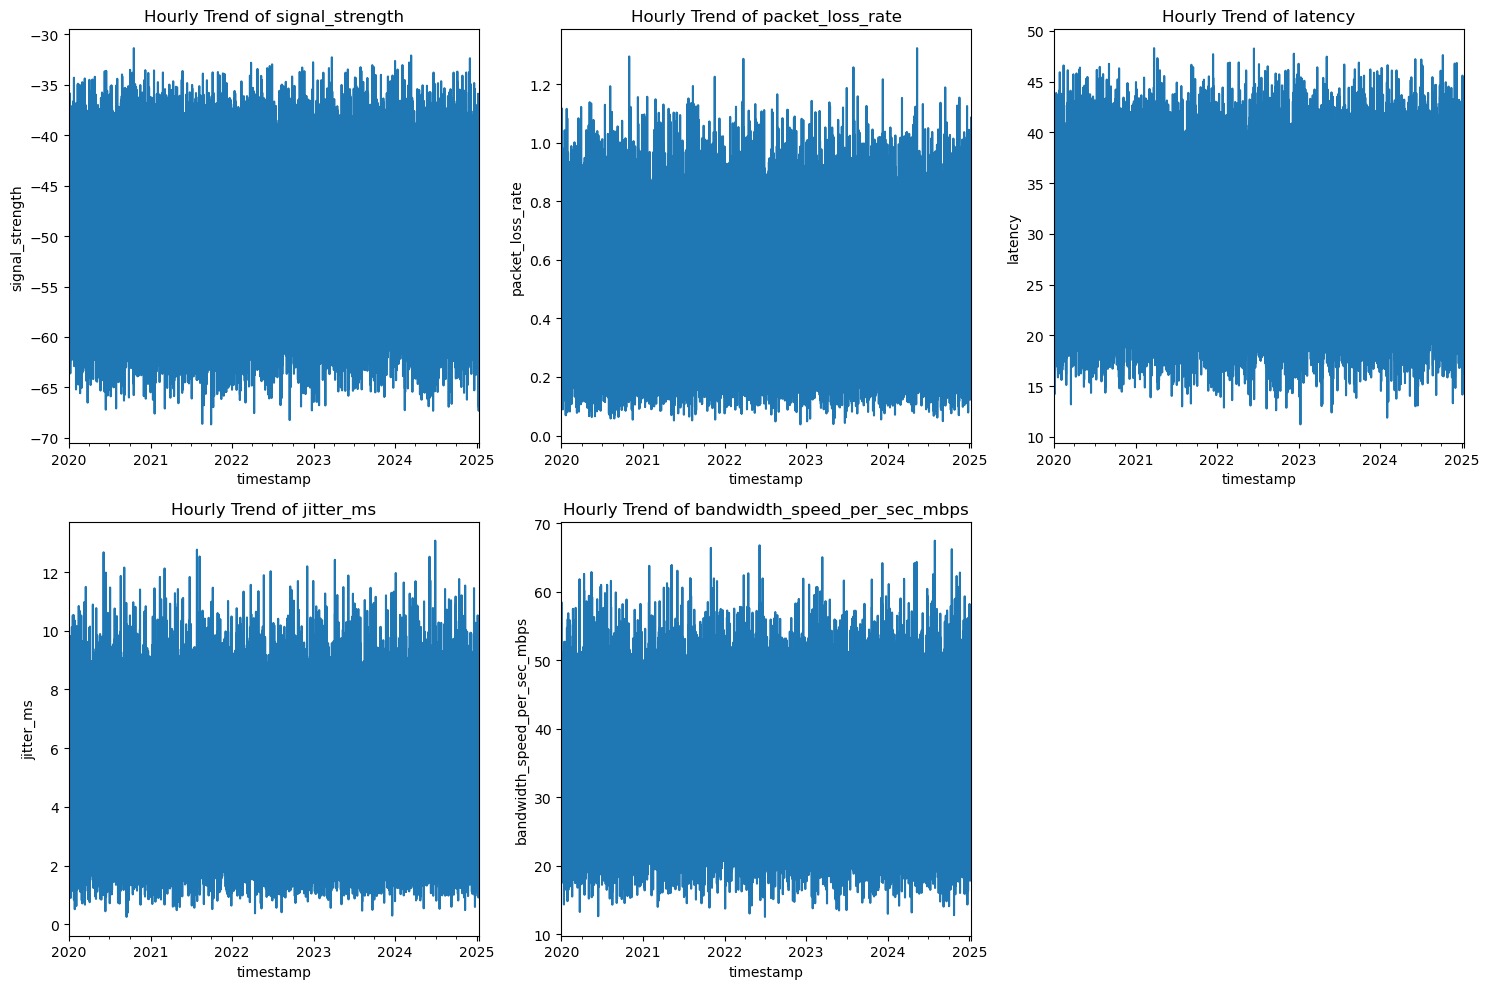

In [7]:

# Time series analysis of average metrics by hour (assuming timestamp is in correct format)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
plt.figure(figsize=(15, 10))
for i, column in enumerate(['signal_strength', 'packet_loss_rate', 'latency', 'jitter_ms', 'bandwidth_speed_per_sec_mbps'], 1):
    plt.subplot(2, 3, i)
    df[column].resample('H').mean().plot()
    plt.title(f'Hourly Trend of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


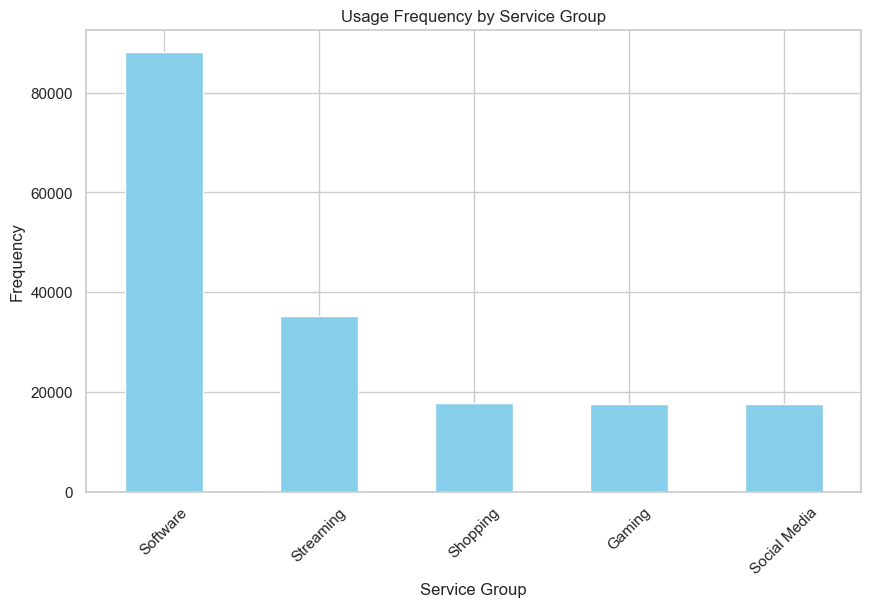

<Figure size 1400x800 with 0 Axes>

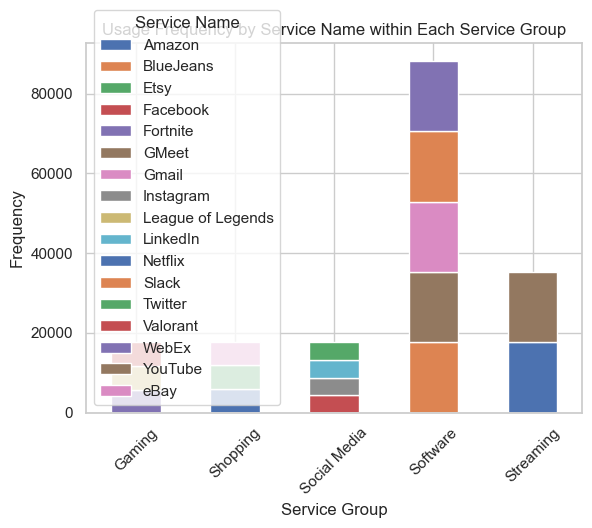

KeyError: 'Column not found: usage_minutes'

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('user_bandwidth_usage_pattern_V3.csv')

# Convert timestamp to datetime for easier manipulation
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Analyzing Usage Frequency Over Service Groups and Service Names

# Group by service group and count occurrences
service_group_counts = df.groupby('service_group').size().sort_values(ascending=False)
service_name_counts = df.groupby(['service_group', 'service_name']).size().sort_values(ascending=False)

# Plotting service group usage frequency
plt.figure(figsize=(10, 6))
service_group_counts.plot(kind='bar', color='skyblue')
plt.title('Usage Frequency by Service Group')
plt.ylabel('Frequency')
plt.xlabel('Service Group')
plt.xticks(rotation=45)
plt.show()

# Plotting service name usage frequency within each service group
plt.figure(figsize=(14, 8))
service_name_counts.unstack().plot(kind='bar', stacked=True)
plt.title('Usage Frequency by Service Name within Each Service Group')
plt.ylabel('Frequency')
plt.xlabel('Service Group')
plt.xticks(rotation=45)
plt.legend(title='Service Name')
plt.show()

### Analyzing Average Usage Time Over Service Groups and Service Names

# Group by service group and service name and calculate average usage time
avg_usage_time = df.groupby(['service_group', 'service_name'])['usage_minutes'].mean().sort_values(ascending=False)

# Plotting average usage time
plt.figure(figsize=(14, 8))
avg_usage_time.unstack().plot(kind='bar', colormap='viridis')
plt.title('Average Usage Time by Service Name within Each Service Group')
plt.ylabel('Average Usage Minutes')
plt.xlabel('Service Group')
plt.xticks(rotation=45)
plt.legend(title='Service Name')
plt.show()

### Network Performance Metrics Over Service Groups

# Calculate average signal strength and latency by service group
avg_network_metrics = df.groupby('service_group')[['signal_strength', 'latency']].mean()

# Plotting average network metrics
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:red'
ax1.set_xlabel('Service Group')
ax1.set_ylabel('Signal Strength (dBm)', color=color)
ax1.bar(avg_network_metrics.index, avg_network_metrics['signal_strength'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Latency (ms)', color=color)
ax2.plot(avg_network_metrics.index, avg_network_metrics['latency'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Average Network Metrics by Service Group')
fig.tight_layout()
plt.show()


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('user_bandwidth_usage_pattern_V3.csv')

# Convert timestamp to datetime for easier manipulation
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define the list of network metrics to analyze
network_metrics = ['signal_strength', 'packet_loss_rate', 'latency', 'jitter_ms', 'bandwidth_speed_per_sec_mbps']

# Setting up the visualization environment
sns.set(style="whitegrid")

# Creating a function to plot distributions for each metric
def plot_distributions(data, metric):
    g = sns.FacetGrid(data, col="service_group", row="service_name", margin_titles=True, col_wrap=3, height=3, aspect=1.5)
    g.map(sns.histplot, metric, kde=True, binwidth=5)
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Distribution of {metric} by Service Group and Service Name', fontsize=16)
    g.add_legend()

# Iterate over each network metric and create a grid of distribution plots
for metric in network_metrics:
    plot_distributions(df, metric)
    plt.show()


ValueError: Cannot use `row` and `col_wrap` together.

In [12]:

# Convert timestamp to datetime for easier manipulation
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define the list of network metrics to analyze
network_metrics = ['signal_strength', 'packet_loss_rate', 'latency', 'jitter_ms', 'bandwidth_speed_per_sec_mbps']

# Setting up the visualization environment
sns.set(style="whitegrid")

# Creating a function to plot distributions for each metric
def plot_distributions(data, metric):
    g = sns.FacetGrid(data, col="service_group", row="service_name", margin_titles=True, col_wrap=3, height=3, aspect=1.5)
    g.map(sns.histplot, metric, kde=True, binwidth=5)
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Distribution of {metric} by Service Group and Service Name', fontsize=16)
    g.add_legend()

# Iterate over each network metric and create a grid of distribution plots
for metric in network_metrics:
    plot_distributions(df, metric)
    plt.show()

ValueError: Cannot use `row` and `col_wrap` together.

/Users/nethrashri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


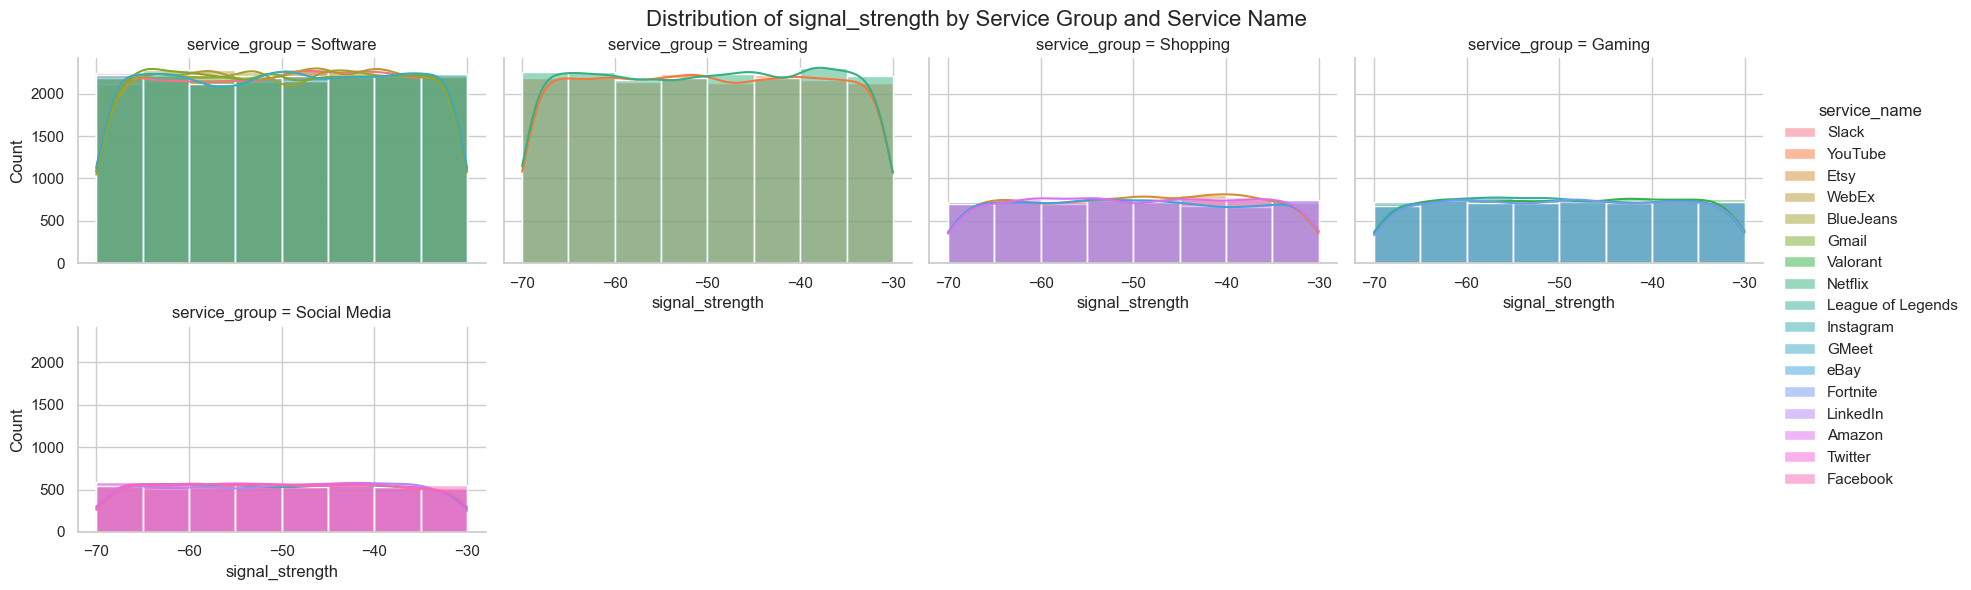

/Users/nethrashri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


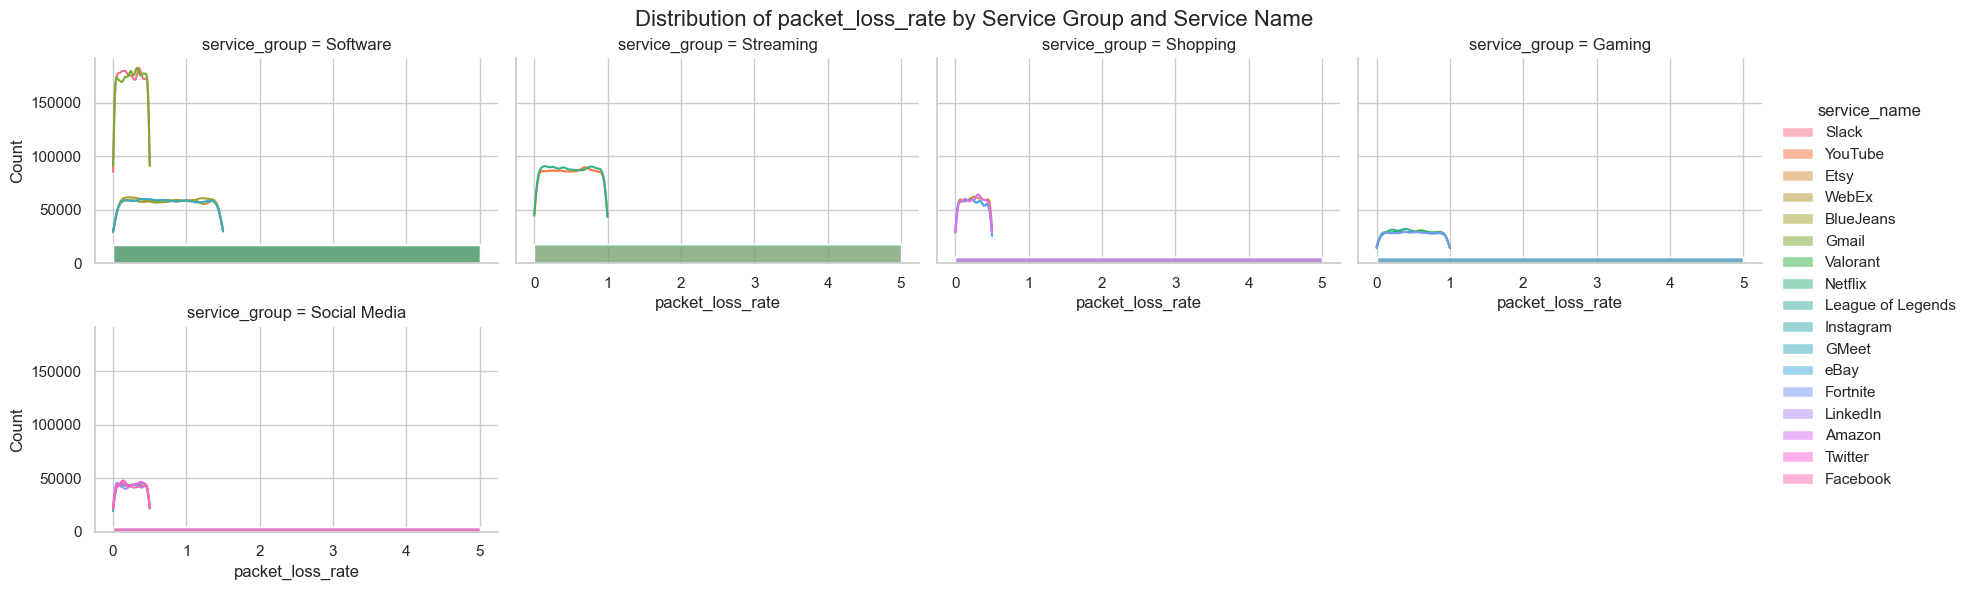

/Users/nethrashri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


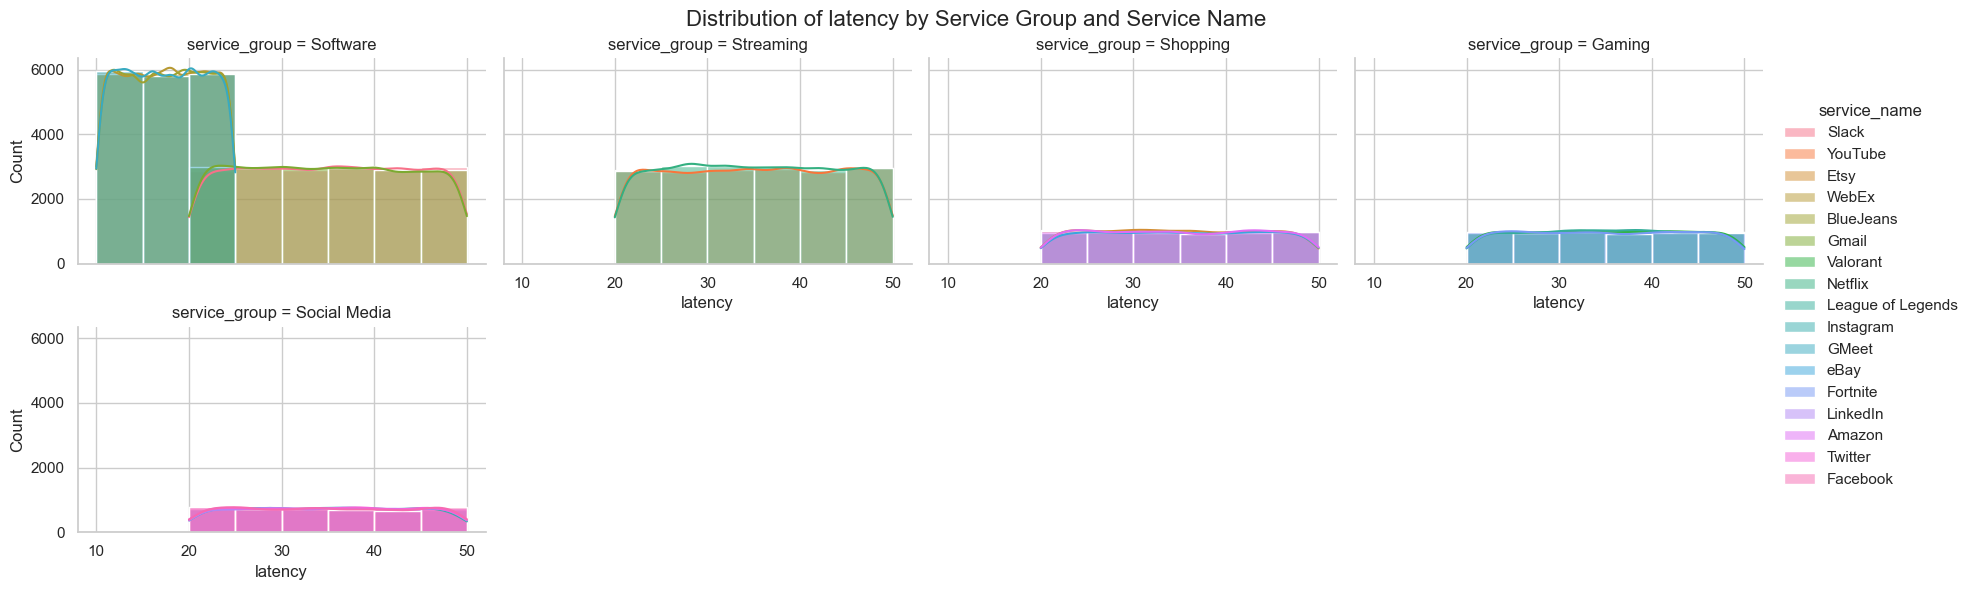

/Users/nethrashri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


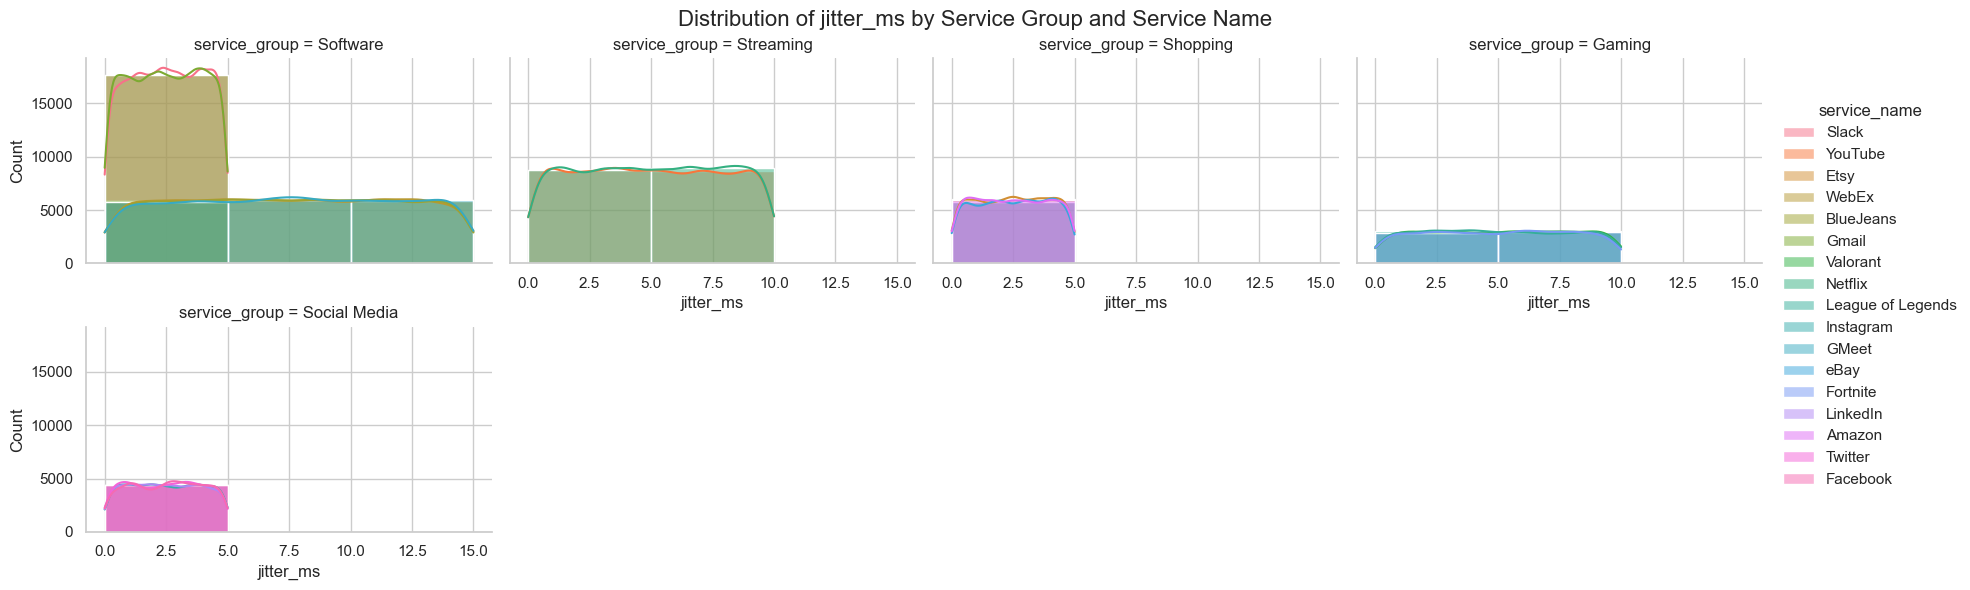

/Users/nethrashri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


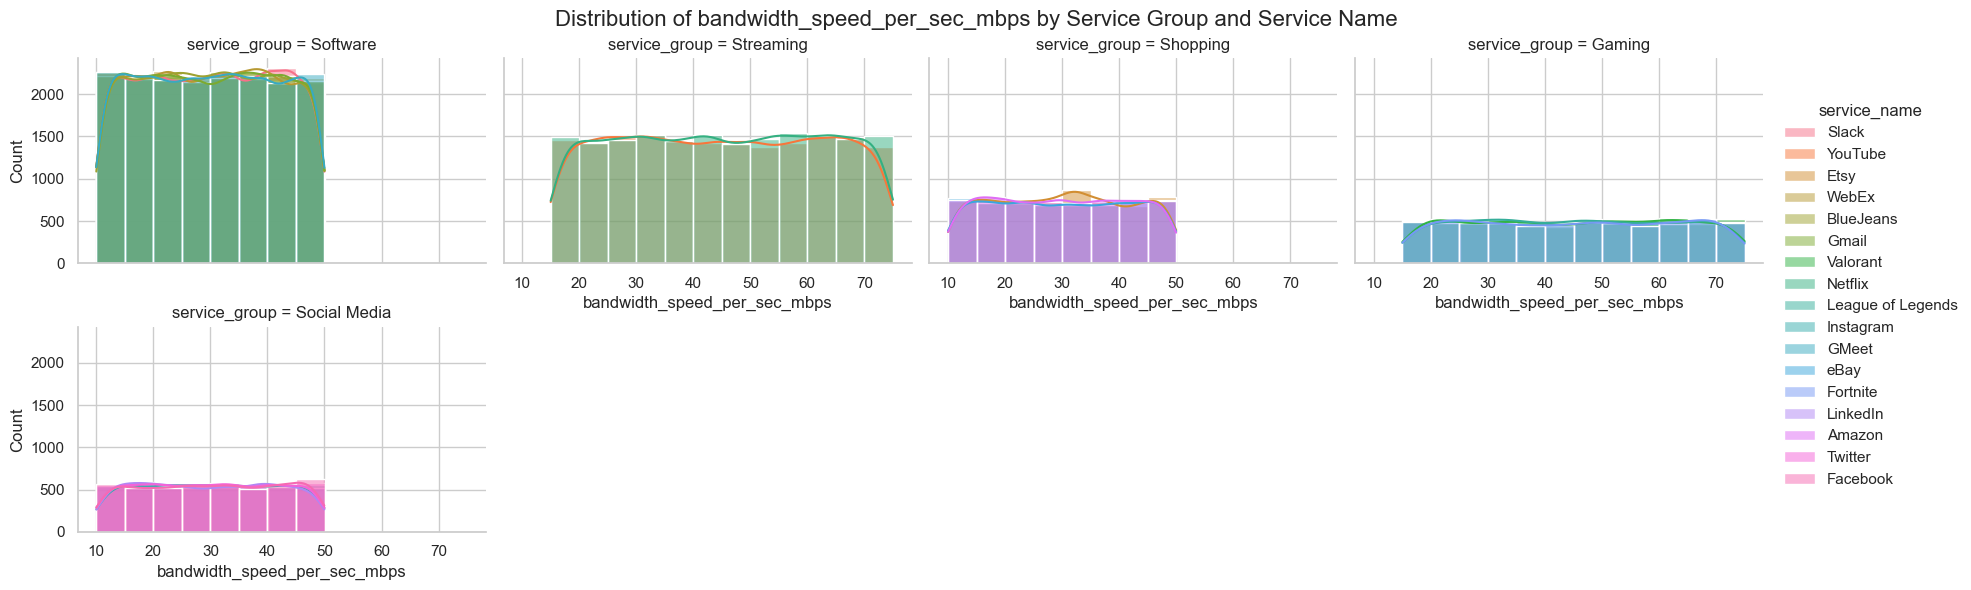

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data

# Define the list of network metrics to analyze
network_metrics = ['signal_strength', 'packet_loss_rate', 'latency', 'jitter_ms', 'bandwidth_speed_per_sec_mbps']

# Setting up the visualization environment
sns.set(style="whitegrid")

# Creating a function to plot distributions for each metric
def plot_distributions(data, metric):
    g = sns.FacetGrid(data, col="service_group", hue="service_name", col_wrap=4, height=3, aspect=1.5)
    g.map(sns.histplot, metric, kde=True, binwidth=5)
    g.add_legend()
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Distribution of {metric} by Service Group and Service Name', fontsize=16)

# Iterate over each network metric and create a grid of distribution plots
for metric in network_metrics:
    plot_distributions(df, metric)
    plt.show()
